In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt




In [3]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)

admiss_core = pd.read_csv("/Users/annasulkko/BIOS6644_GitHub/BIOS6644_Spring_2024/Modules/Module_1/data/AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("/Users/annasulkko/BIOS6644_GitHub/BIOS6644_Spring_2024/Modules/Module_1/data/AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("/Users/annasulkko/BIOS6644_GitHub/BIOS6644_Spring_2024/Modules/Module_1//data/PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("/Users/annasulkko/BIOS6644_GitHub/BIOS6644_Spring_2024/Modules/Module_1//data/LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [49]:
# 1) 
admiss_core,
admiss_diag_core
patient_core
labs_core

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677
...,...,...,...,...,...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840


In [5]:
# Dates!

In [50]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
def convert_cols_to_datetime(df):
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            df[col] = pd.to_datetime(df[col])
  

In [7]:

# 1) 
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)

In [8]:
admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']

Timedelta('5 days 10:14:56.766000')

In [9]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	
pid='7A025E77-7832-4F53-B9A7-09A3F98AC17E'

#admiss_core
admiss_core.loc[admiss_core.index==pid]

#admiss_dialog_core
admiss_diag_core.loc[admiss_diag_core.index==pid]
                       
#patient_core
 
patient_core.loc[patient_core.index==pid]
                       
#labs_core                       
                       
labs_core.loc[labs_core.index==pid]

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [10]:
labs_core.loc[labs_core.index==pid]


,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [11]:
# SQL-like joins
jdf =  patient_core.join(labs_core, how='left')


In [12]:
jdf.shape, patient_core.shape, labs_core.shape

((111483, 11), (100, 6), (111483, 5))

In [51]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()

# Group by patient id and count the number of labs for each patient
patient_lab_counts = jdf.groupby('PatientID')['LabDateTime'].count()

# Average and Standard Deviation
average_labs_per_patient = patient_lab_counts.mean()
std_dev_labs_per_patient = patient_lab_counts.std()

print("Average number of labs per patient:", average_labs_per_patient)
print("Standard deviation of labs per patient:", std_dev_labs_per_patient)
print("Stats on Number of Labs per Patient:",patient_lab_counts)

# Descriptive Statistics

print("Stats on Number of Labs per Patient")
print(jdf.groupby('PatientID').size().describe())


# 2)Count of Lab Orders

lab_list = jdf.groupby('LabName')['LabDateTime'].count()
print("number of each lab:",lab_list)




Average number of labs per patient: 1114.83
Standard deviation of labs per patient: 539.3615203144915
Stats on Number of Labs per Patient: PatientID
016A590E-D093-4667-A5DA-D68EA6987D93    1132
03A481F5-B32A-4A91-BD42-43EB78FEBA77     528
0681FA35-A794-4684-97BD-00B88370DB41     913
0A9BA3E4-CF3C-49C4-9774-5EEA2EE7D123     958
0BC491C5-5A45-4067-BD11-A78BEA00D3BE     725
                                        ... 
FA157FA5-F488-4884-BF87-E144630D595C    1160
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F     627
FB909FAE-72DD-4F6F-9828-D92183DF185F     832
FE0B9B59-1927-45B7-8556-E079DC1DE30A     679
FFCDECD6-4048-4DCB-B910-1218160005B3    1136
Name: LabDateTime, Length: 100, dtype: int64
Stats on Number of Labs per Patient
count     100.00000
mean     1114.83000
std       539.36152
min        86.00000
25%       706.25000
50%      1032.50000
75%      1441.25000
max      2760.00000
dtype: float64
number of each lab: LabName
CBC: ABSOLUTE LYMPHOCYTES        3162
CBC: ABSOLUTE NEUTROPHILS        3

In [52]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#1) Find the patient/lab combination with the most labs taken

# Group by patient_id and lab_id and count the occurrences
lab_counts = jdf.groupby(['PatientID', 'LabName']).size().reset_index(name='count')

# maximum count
max_lab = lab_counts.loc[lab_counts['count'].idxmax()]

# Extract patient_id and lab_id with the maximum count
patient_id_with_max_lab = max_lab['PatientID']
lab_id_with_max_lab = max_lab['LabName']
max_lab_count = max_lab['count']

print("Patient ID with the most labs:", patient_id_with_max_lab)
print("Lab ID with the most labs:", lab_id_with_max_lab)
print("Number of labs taken:", max_lab_count)


#   2) For the most-measured patient/lab combination, make a time vs lab-value plot

# 
#most_measured_data = jdf[(jdf['PatientID'] == patient_id_with_max_lab) & (jdf['LabName'] == lab_id_with_max_lab)]

# 
#time_values = most_measured_data['LabDateTime']
#lab_values = most_measured_data['LabValue']

# Plot 
#plt.figure(figsize=(10, 6))
#plt.plot(time_values, lab_values, marker='o', linestyle='-')
#plt.title('Time vs. Lab Value for Most-Measured Patient/Lab Combination')
#plt.xlabel('Time')
#plt.ylabel('Lab Value')
#plt.grid(True)
#plt.show()


Patient ID with the most labs: 80D356B4-F974-441F-A5F2-F95986D119A2
Lab ID with the most labs: CBC: HEMATOCRIT
Number of labs taken: 88


In [53]:
# 1) 
jdf.groupby(['PatientID','LabName']).size().sort_values()


PatientID                             LabName                     
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  CBC: LYMPHOCYTES                 1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  URINALYSIS: SPECIFIC GRAVITY     1
                                      CBC: HEMATOCRIT                  1
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  METABOLIC: SODIUM                1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  CBC: EOSINOPHILS                 2
                                                                      ..
80D356B4-F974-441F-A5F2-F95986D119A2  CBC: HEMOGLOBIN                 83
                                      METABOLIC: ALT/SGPT             84
                                      METABOLIC: POTASSIUM            84
                                      CBC: PLATELET COUNT             84
                                      CBC: HEMATOCRIT                 88
Length: 3499, dtype: int64

In [16]:
thebusypatient = '80D356B4-F974-441F-A5F2-F95986D119A2' # put patient ID here
thebusylab = 'CBC: HEMATOCRIT'
subdf = jdf.loc[(jdf.index==thebusypatient) & (jdf.LabName.str.startswith(thebusylab))]

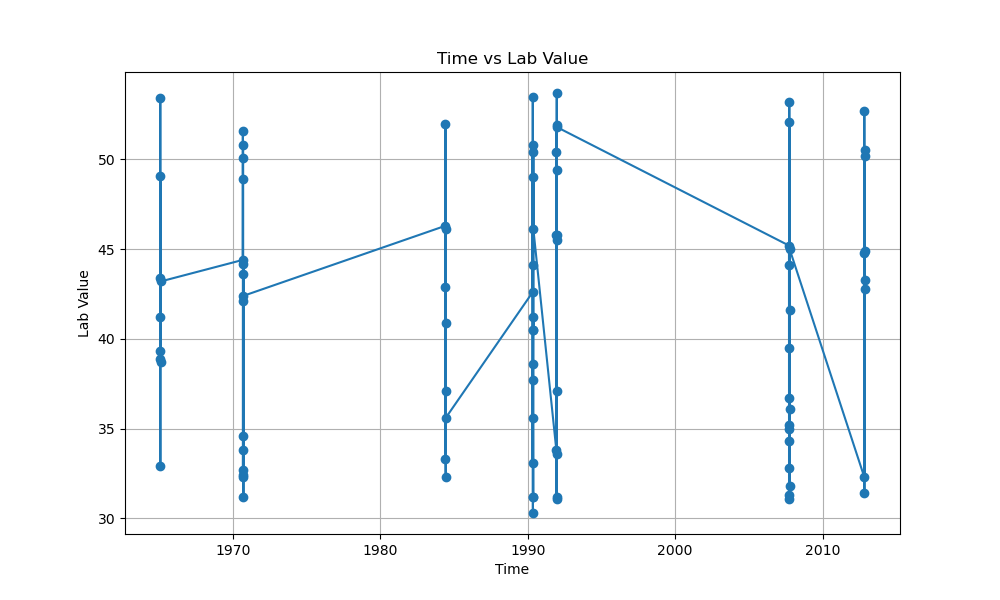

In [54]:
# 2) Time vs. Lab Value Plot
%matplotlib widget

time_values = subdf['LabDateTime']
lab_values = subdf['LabValue']


plt.figure(figsize=(10, 6))
plt.plot(time_values, lab_values, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Lab Value')
plt.title('Time vs Lab Value')
plt.grid(True)
plt.show()



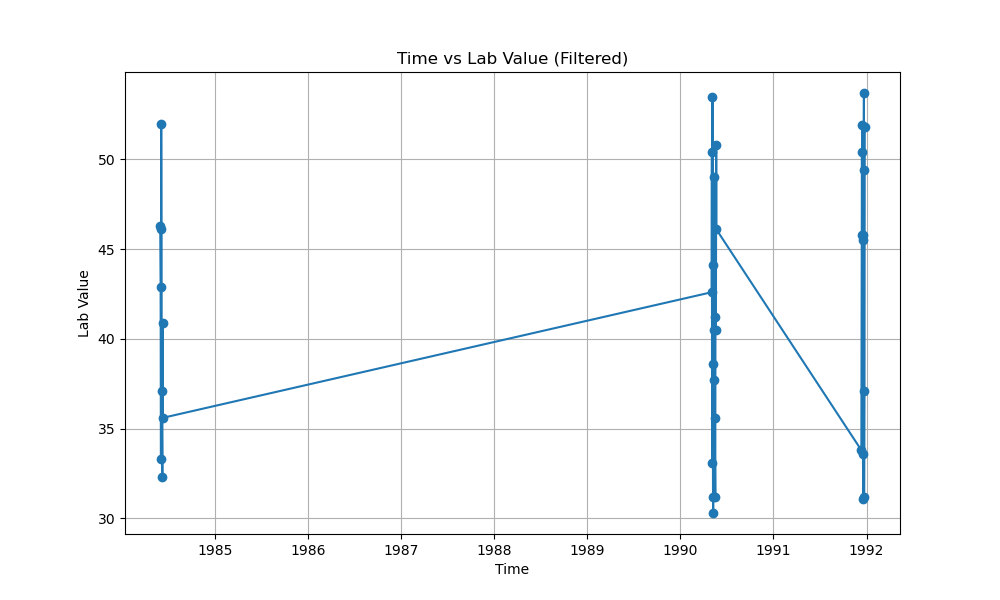

In [55]:
##################################################################################################################

#This section remains a WIP however, presently there are no lab values on both August 6, 1985 and December, 14 1991 
#which I am having a difficult time confirming . 


#Patient Lab Value Table
pid='80D356B4-F974-441F-A5F2-F95986D119A2'

subdf.loc[subdf.index==pid]





#Patient Plot with Time frame 1980-1995

start_date = '1980-01-01'
end_date = '1995-01-01'


filtered_df = subdf[(subdf['LabDateTime'] >= start_date) & (subdf['LabDateTime'] <= end_date)]


plt.figure(figsize=(10, 6))
plt.plot(filtered_df['LabDateTime'], filtered_df['LabValue'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Lab Value')
plt.title('Time vs Lab Value (Filtered)')
plt.grid(True)
plt.show()




In [43]:

pid='80D356B4-F974-441F-A5F2-F95986D119A2'


subdf.loc[subdf.index==pid]








,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,,,,,,,
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,39.3,%,1965-01-31 04:20:01.450
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,38.9,%,1965-02-01 04:24:54.520
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,53.4,%,1965-02-01 12:06:34.270
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,32.9,%,1965-02-03 07:18:53.007
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,49.1,%,1965-02-03 23:01:51.497
...,...,...,...,...,...,...,...,...,...,...,...
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,7,CBC: HEMATOCRIT,43.3,%,2012-11-02 08:12:45.127
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,7,CBC: HEMATOCRIT,50.2,%,2012-11-04 22:07:36.617
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,7,CBC: HEMATOCRIT,42.8,%,2012-11-06 14:33:02.890
